In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
data = pd.read_csv('/content/drive/MyDrive/web_dev.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Levels_Fyi_Salary_Data.csv')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
le = LabelEncoder()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-7-901802720527>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data2.corr(),vmax=1,annot=True)


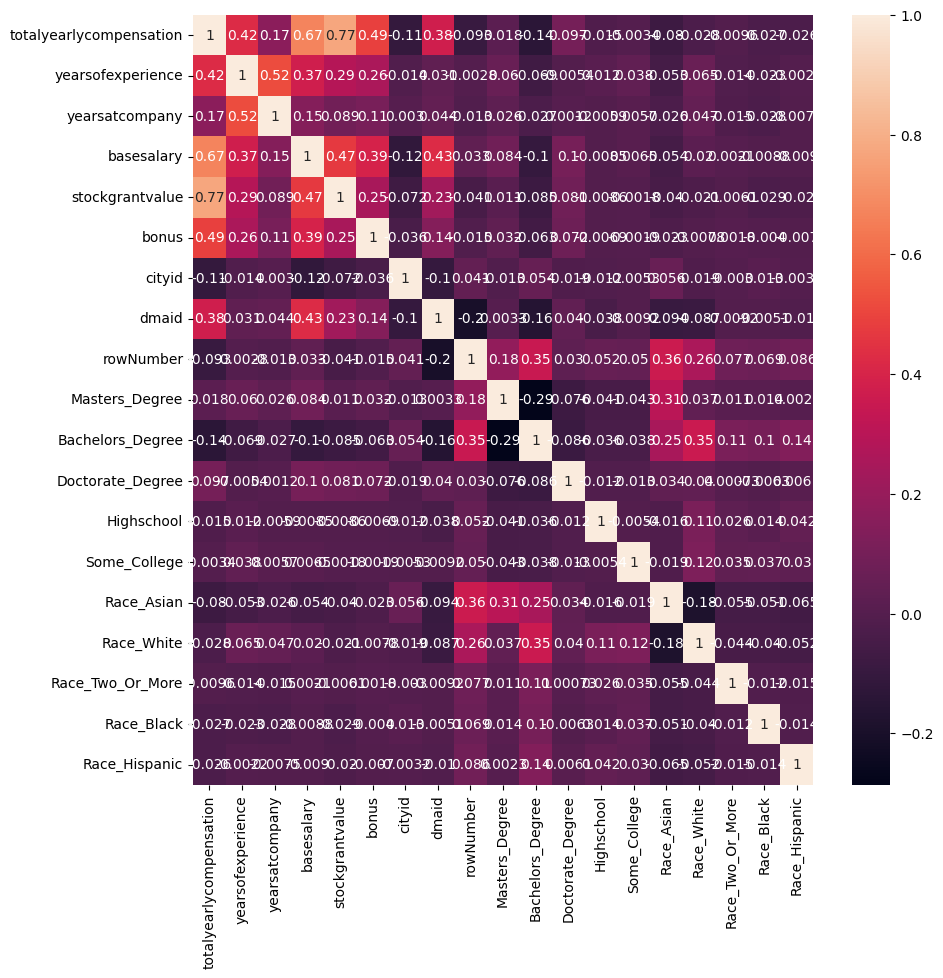

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(data2.corr(),vmax=1,annot=True) 
heatmap.set_title=('correlation heatmap')

In [ ]:
#if we dont drop features, it will take long to generate
#plots
data2 = data2.drop(['yearsatcompany','location','stockgrantvalue','Education','gender','otherdetails','tag','Highschool','Some_College','rowNumber','dmaid','cityid','timestamp','totalyearlycompensation'], axis=1)
data2 = data2[data2.columns.drop(list(data2.filter(regex='Race')))]
data2 = data2[data2.columns.drop(list(data2.filter(regex='Degree')))]

In [ ]:
#based on null values in categorical features above, we
#may have to drop those rows
data2 = data2.dropna()
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62518 entries, 0 to 62641
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            62518 non-null  object 
 1   level              62518 non-null  object 
 2   title              62518 non-null  object 
 3   yearsofexperience  62518 non-null  float64
 4   basesalary         62518 non-null  float64
 5   bonus              62518 non-null  float64
dtypes: float64(3), object(3)
memory usage: 3.3+ MB


In [ ]:
#since no missing values, lets count number of 0s
#we will opt out 0 values for years of experience 
#because employees can have 0 experiences in this field
print(data2['basesalary'].value_counts()[0])
print(data2['bonus'].value_counts()[0])

2300
15385


In [ ]:
#replace those 0 with median according to measuring central tedencies
#and distribution graph above
data2['basesalary']=data2[['basesalary']].replace(0,data2['basesalary'].median())
data2['bonus']=data2[['bonus']].replace(0,data2['bonus'].median())

In [ ]:
#now that we have get rid of null and 0s, lets look at outliers
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
model = kmeans.fit(data2[['bonus','basesalary']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
def distance_from_center(bonus, basesalary, label):
    
    center_income =  model.cluster_centers_[label,0]
    center_age =  model.cluster_centers_[label,1]
    

    distance = np.sqrt((bonus - center_income) ** 2 + (basesalary - center_age) ** 2)
    return np.round(distance, 3)
data2['label'] = model.labels_
data2['distance'] = distance_from_center(data2.bonus, data2.basesalary, data2.label)

In [ ]:
outliers_idx = list(data2.sort_values('distance', ascending=False).head(10).index)
outliers = data2[data2.index.isin(outliers_idx)]
print(outliers)

                   company                     level  \
638                    IBM                    Band 8   
7835   Jane Street Capital         Software Engineer   
45054                  PwC       Partner / Principal   
56175              Netflix  Senior Software Engineer   
56529              Netflix  Senior Software Engineer   
57701              Netflix  Senior Software Engineer   
59231         PDT Partners            Vice President   
61851          Squarespace                  Senior I   
61967            Microsoft                        80   
62351            Microsoft                        64   

                              title  yearsofexperience  basesalary      bonus  \
638               Software Engineer                6.0    125000.0  1000000.0   
7835              Software Engineer                7.0    400000.0   630000.0   
45054         Management Consultant               22.0    900000.0    14000.0   
56175             Software Engineer               19.0    8

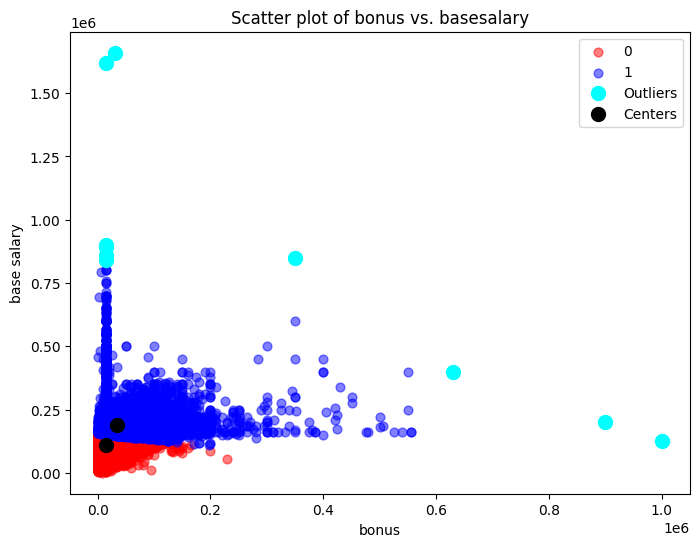

In [ ]:
colors=["red","blue","green","orange"]
plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_)+1):
    plt.scatter(data2[model.labels_==i].bonus, data2[model.labels_==i].basesalary, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(outliers.bonus, outliers.basesalary, c='aqua', s=100, label='Outliers')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of STEM DATA 2",size=20)
plt.xlabel("bonus")
plt.ylabel("base salary")
plt.title('Scatter plot of bonus vs. basesalary')
plt.legend()
plt.show()

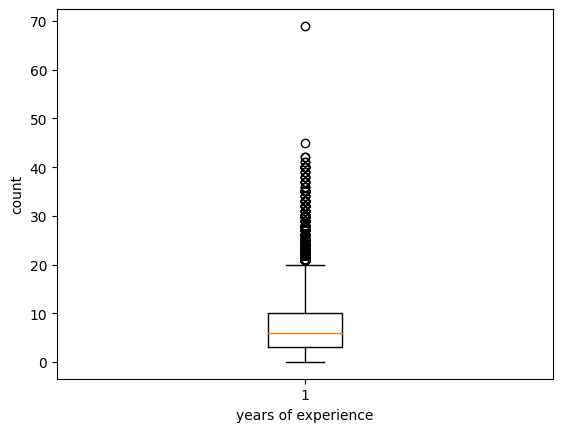

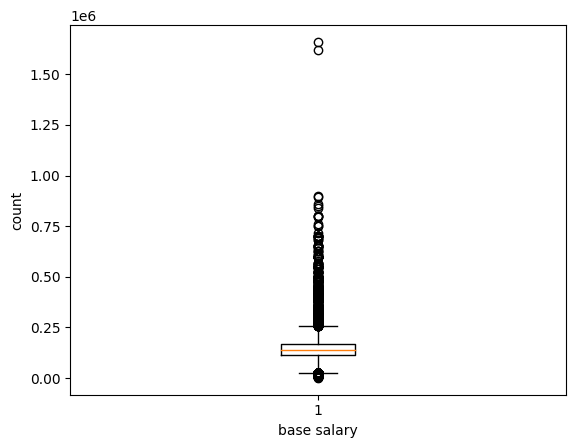

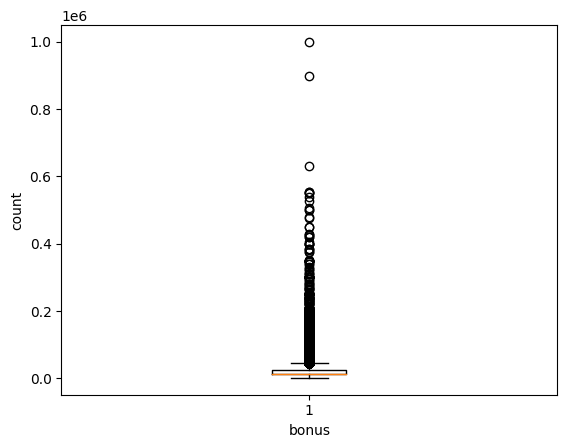

In [ ]:
plt.boxplot(data2["yearsofexperience"])
plt.xlabel("years of experience")
plt.ylabel("count")

plt.show()
plt.boxplot(data2["basesalary"])
plt.xlabel("base salary")
plt.ylabel("count")
plt.show()
plt.boxplot(data2["bonus"])
plt.xlabel("bonus")
plt.ylabel("count")
plt.show()

In [ ]:
print(data2['yearsofexperience'].quantile(0.10))
print(data2['yearsofexperience'].quantile(0.90))

print(data2['bonus'].quantile(0.10))
print(data2['bonus'].quantile(0.90))
print(data2['basesalary'].quantile(0.10))
print(data2['basesalary'].quantile(0.90))

1.0
15.0
7000.0
44000.0
79000.0
200000.0


In [ ]:
data2['yearsofexperience'] = np.where(data2['yearsofexperience'] <1.0, 1.0,data2['yearsofexperience'])
data2['yearsofexperience'] = np.where(data2['yearsofexperience'] >15.0, 15.0,data2['yearsofexperience'])
data2['bonus'] = np.where(data2['bonus'] <7000.0, 7000.0,data2['bonus'])
data2['bonus'] = np.where(data2['bonus'] >44000.0, 44000.0,data2['bonus'])
data2['basesalary'] = np.where(data2['basesalary'] <79000.0, 79000.0,data2['basesalary'])
data2['basesalary'] = np.where(data2['basesalary'] >200000.0, 200000.0,data2['basesalary'])

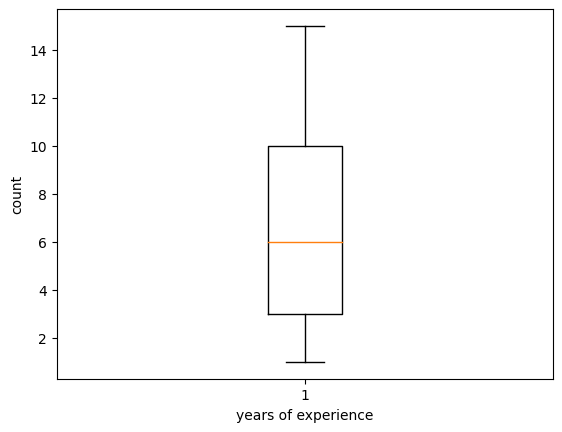

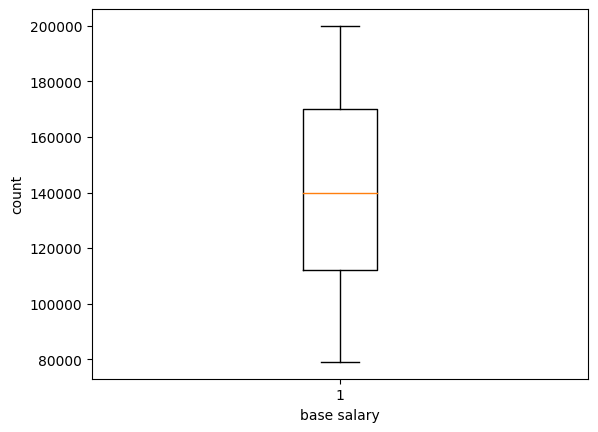

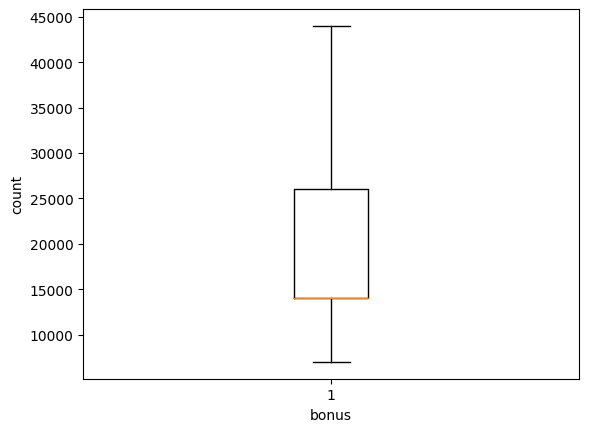

In [ ]:
plt.boxplot(data2["yearsofexperience"])
plt.xlabel("years of experience")
plt.ylabel("count")

plt.show()
plt.boxplot(data2["basesalary"])
plt.xlabel("base salary")
plt.ylabel("count")
plt.show()
plt.boxplot(data2["bonus"])
plt.xlabel("bonus")
plt.ylabel("count")
plt.show()

In [ ]:
data2 = data2.drop(columns=['label', 'distance'])

data2.head()

,company,level,title,yearsofexperience,basesalary,bonus
0,Oracle,L3,Product Manager,1.5,107000.0,10000.0
1,eBay,SE 2,Software Engineer,5.0,140000.0,14000.0
2,Amazon,L7,Product Manager,8.0,155000.0,14000.0
3,Apple,M1,Software Engineering Manager,7.0,157000.0,35000.0
4,Microsoft,60,Software Engineer,5.0,140000.0,14000.0


In [ ]:
from sklearn import preprocessing
#in order to fit in random forest classifer 
#feature selection, we must convert string to numeric
d = {}
for i in data2.columns[0:]:
  if(data2[i].dtype == 'object'):
    #data2[i]=le.fit(data2[i])
    d[i]=preprocessing.LabelEncoder().fit(data2[i])
 
for i in data2.columns[0:]:
  if(data2[i].dtype == 'object'):
    data2[i]=d[i].transform(data2[i])
    


In [ ]:
data2.head()

,company,level,title,yearsofexperience,basesalary,bonus
0,920,1091,8,1.5,107000.0,10000.0
1,1457,1796,11,5.0,140000.0,14000.0
2,64,1175,8,8.0,155000.0,14000.0
3,95,1294,12,7.0,157000.0,35000.0
4,818,142,11,5.0,140000.0,14000.0


In [ ]:
X = data2.drop(['basesalary'], axis=1)

y = data2['basesalary']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# random forest classifier because it can
#handle both categorical and numerical data

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

company              0.278717
level                0.270230
bonus                0.190417
yearsofexperience    0.148582
title                0.112054
dtype: float64

In [ ]:
#since title feature has the least scores, we can drop it
data2 = data2.drop(['title'], axis=1)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62518 entries, 0 to 62641
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            62518 non-null  int64  
 1   level              62518 non-null  int64  
 2   yearsofexperience  62518 non-null  float64
 3   basesalary         62518 non-null  float64
 4   bonus              62518 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 2.9 MB


In [ ]:
#inverse values back to string
#data2 is now cleaned
for i in data2.columns[0:]:
  if(data2[i].dtype == 'int64'):
    data2[i]=d[i].inverse_transform(data2[i])

data2.head()

,company,level,yearsofexperience,basesalary,bonus
0,Oracle,L3,1.5,107000.0,10000.0
1,eBay,SE 2,5.0,140000.0,14000.0
2,Amazon,L7,8.0,155000.0,14000.0
3,Apple,M1,7.0,157000.0,35000.0
4,Microsoft,60,5.0,140000.0,14000.0


In [ ]:
data.head()

,Unnamed: 0,id,job_title,job_role,job_location,easy_apply,company_name,salary,company_rating,min_salary,max_salary
0,1,1008079793339,Software Developer,Web Applications Developer,"Wilton, CT",True,Tenth Mountain Recruiting,"$100,000 - $125,000",4.5,100000.0,125000.0
1,2,1007607350396,Software Developer,Software Developer,Remote,True,TherapyNotes.com,"$63,000 - $81,472",4.0,63000.0,81472.0
2,3,1008062785194,Software Developer,Software Developer for Web with Azure backend,"Lexington, KY",True,CentrAlert Inc.,"$65,000 - $120,000",4.0,65000.0,120000.0
3,4,1007190807289,Software Developer,Full Stack Web Developers - Senior & Junior,"Albany, NY",True,MM Hayes,"$120,000",3.7,120000.0,120000.0
4,5,1007961472868,Software Developer,Full Stack Developer,"Kernersville, NC",True,Best Logistics Group,"$120,000",3.9,120000.0,120000.0


In [ ]:
#our data set 1 looks good with lesser null values
data.isnull().sum()

Unnamed: 0          0
id                  0
job_title          30
job_role            0
job_location        0
easy_apply          0
company_name        0
salary            136
company_rating    267
min_salary        136
max_salary        136
dtype: int64

<ipython-input-32-0ab560bcc59d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(), vmax =1, annot = True)


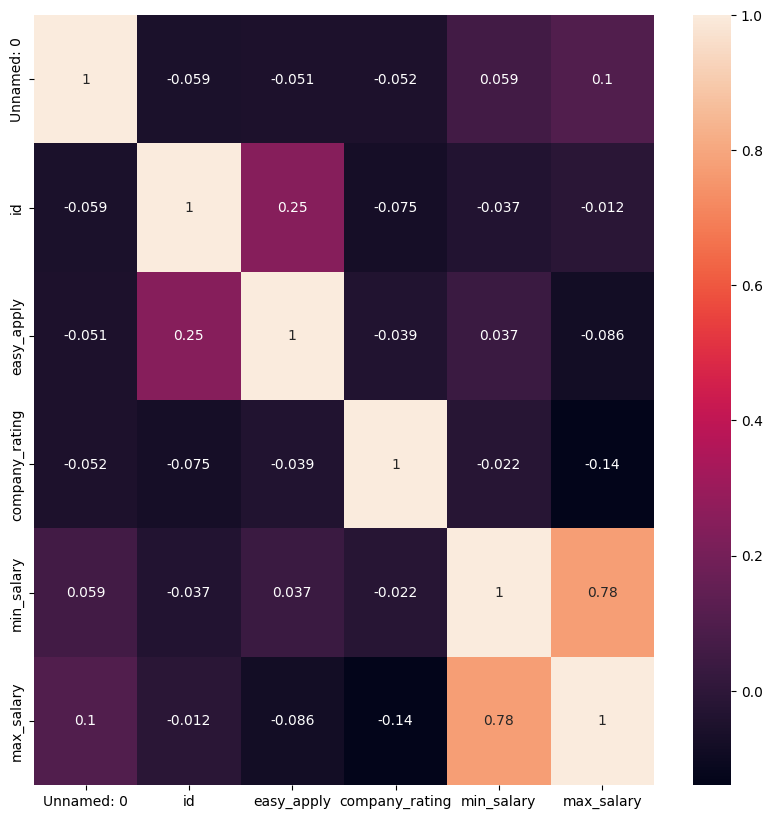

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(data.corr(), vmax =1, annot = True)
heatmap.set_title=('correlation heatmap')

In [ ]:
data = data.drop(['Unnamed: 0','salary','id','easy_apply', 'max_salary', 'company_rating'], axis=1)
data.isnull().sum()

job_title        30
job_role          0
job_location      0
company_name      0
min_salary      136
dtype: int64

<ipython-input-34-7e95f45a0a72>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['min_salary'], kde = True, color = 'red', bins = 20)


<Axes: xlabel='min_salary', ylabel='Density'>

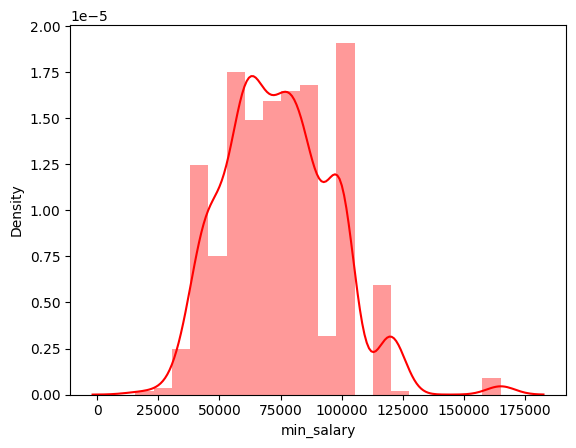

In [ ]:
sns.distplot(data['min_salary'], kde = True, color = 'red', bins = 20)

In [ ]:
data.isnull().sum()

job_title        30
job_role          0
job_location      0
company_name      0
min_salary      136
dtype: int64

In [ ]:
data = data.dropna()
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 863
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   job_title     740 non-null    object 
 1   job_role      740 non-null    object 
 2   job_location  740 non-null    object 
 3   company_name  740 non-null    object 
 4   min_salary    740 non-null    float64
dtypes: float64(1), object(4)
memory usage: 34.7+ KB


In [ ]:
data['min_salary']=data[['min_salary']].replace(0,data['min_salary'].median())

<ipython-input-37-22ccd3508b4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['min_salary']=data[['min_salary']].replace(0,data['min_salary'].median())


<ipython-input-38-7e95f45a0a72>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['min_salary'], kde = True, color = 'red', bins = 20)


<Axes: xlabel='min_salary', ylabel='Density'>

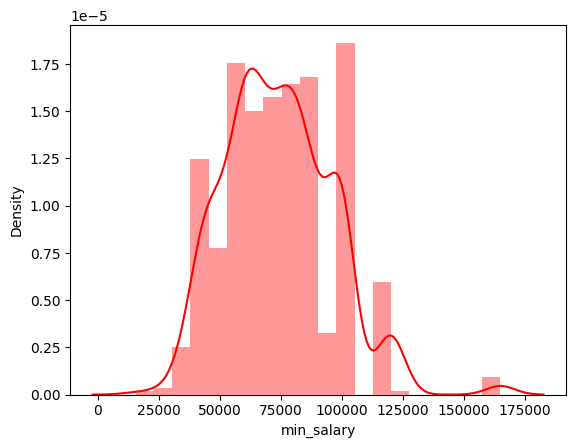

In [ ]:
sns.distplot(data['min_salary'], kde = True, color = 'red', bins = 20)

<function matplotlib.pyplot.show(close=None, block=None)>

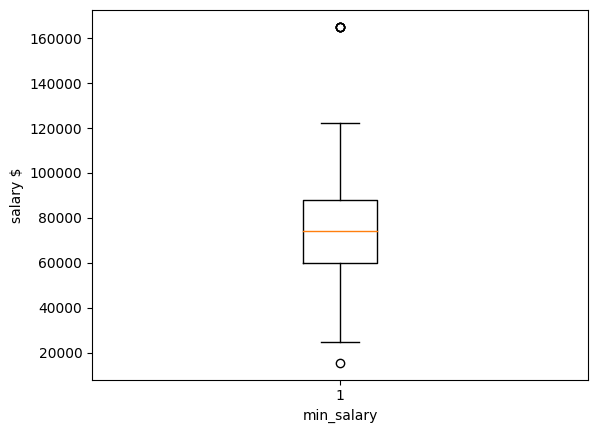

In [ ]:
plt.boxplot(data['min_salary'])
plt.xlabel("min_salary")
plt.ylabel("salary $")
plt.show

In [ ]:
#interquantile range 

iqr= data['min_salary'].quantile(0.75)-data['min_salary'].quantile(0.25)
iqr

lower_bridge = data['min_salary'].quantile(0.25)- (iqr*1.5)
upper_bridge = data['min_salary'].quantile(0.75)+ (iqr*1.5)

print(lower_bridge)
print(upper_bridge)

17300.5
130520.5


<function matplotlib.pyplot.show(close=None, block=None)>

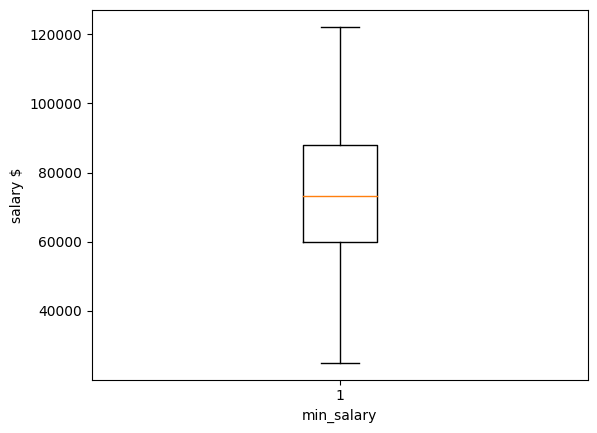

In [ ]:
data = data[data['min_salary'] > lower_bridge] 
data = data[data['min_salary']< upper_bridge]
data.shape


plt.boxplot(data['min_salary'])
plt.xlabel("min_salary")
plt.ylabel("salary $")
plt.show

In [ ]:
data.head()

,job_title,job_role,job_location,company_name,min_salary
0,Software Developer,Web Applications Developer,"Wilton, CT",Tenth Mountain Recruiting,100000.0
1,Software Developer,Software Developer,Remote,TherapyNotes.com,63000.0
2,Software Developer,Software Developer for Web with Azure backend,"Lexington, KY",CentrAlert Inc.,65000.0
3,Software Developer,Full Stack Web Developers - Senior & Junior,"Albany, NY",MM Hayes,120000.0
4,Software Developer,Full Stack Developer,"Kernersville, NC",Best Logistics Group,120000.0


In [ ]:
data.isnull().sum()

job_title       0
job_role        0
job_location    0
company_name    0
min_salary      0
dtype: int64

In [ ]:
#since base salary from data2 is equivalent to min salary in set 1, rename it
data2 = data2.rename({'basesalary':'min_salary','company':'company_name'},axis=1)
data2.head()

,company_name,level,yearsofexperience,min_salary,bonus
0,Oracle,L3,1.5,107000.0,10000.0
1,eBay,SE 2,5.0,140000.0,14000.0
2,Amazon,L7,8.0,155000.0,14000.0
3,Apple,M1,7.0,157000.0,35000.0
4,Microsoft,60,5.0,140000.0,14000.0


In [ ]:
merged_df = pd.merge(data, data2, on=['company_name','min_salary'], how='outer')
#merged_df = pd.concat([data,data2], axis=0)
merged_df.isnull().sum()

job_title            62518
job_role             62518
job_location         62518
company_name             0
min_salary               0
level                  734
yearsofexperience      734
bonus                  734
dtype: int64

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63252 entries, 0 to 63251
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          734 non-null    object 
 1   job_role           734 non-null    object 
 2   job_location       734 non-null    object 
 3   company_name       63252 non-null  object 
 4   min_salary         63252 non-null  float64
 5   level              62518 non-null  object 
 6   yearsofexperience  62518 non-null  float64
 7   bonus              62518 non-null  float64
dtypes: float64(3), object(5)
memory usage: 4.3+ MB


In [ ]:
#We can drop the rows with n/a values under categorical data
#since dropping rows is not ideal(because it will delete entire data)
#we can take approach where we encode data and do feature selection
from sklearn import preprocessing
#in order to fit in random forest classifer 
#feature selection, we must convert string to numeric
d = {}
for i in merged_df.columns[0:]:
  if(merged_df[i].dtype == 'object'):
    #data2[i]=le.fit(data2[i])
    d[i]=preprocessing.LabelEncoder().fit(merged_df[i])
 
for i in merged_df.columns[0:]:
  if(merged_df[i].dtype == 'object'):
    merged_df[i]=d[i].transform(merged_df[i])

In [ ]:
#lets fill in NaN values in years of exp and bonus
merged_df.head()

,job_title,job_role,job_location,company_name,min_salary,level,yearsofexperience,bonus
0,8,79,88,1306,100000.0,2923,NaN,NaN
1,0,79,88,1306,100000.0,2923,NaN,NaN
2,10,79,88,1306,100000.0,2923,NaN,NaN
3,10,79,88,1306,100000.0,2923,NaN,NaN
4,0,79,88,1306,100000.0,2923,NaN,NaN


In [ ]:
merged_df['bonus'].fillna(value=merged_df['bonus'].median(), inplace=True)
merged_df['yearsofexperience'].fillna(value=merged_df['yearsofexperience'].median(), inplace=True)

In [ ]:
merged_df.isnull().sum()

job_title            0
job_role             0
job_location         0
company_name         0
min_salary           0
level                0
yearsofexperience    0
bonus                0
dtype: int64

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63252 entries, 0 to 63251
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          63252 non-null  int64  
 1   job_role           63252 non-null  int64  
 2   job_location       63252 non-null  int64  
 3   company_name       63252 non-null  int64  
 4   min_salary         63252 non-null  float64
 5   level              63252 non-null  int64  
 6   yearsofexperience  63252 non-null  float64
 7   bonus              63252 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 4.3 MB


In [ ]:
merged_df.head()

,job_title,job_role,job_location,company_name,min_salary,level,yearsofexperience,bonus
0,8,79,88,1306,100000.0,2923,6.0,14000.0
1,0,79,88,1306,100000.0,2923,6.0,14000.0
2,10,79,88,1306,100000.0,2923,6.0,14000.0
3,10,79,88,1306,100000.0,2923,6.0,14000.0
4,0,79,88,1306,100000.0,2923,6.0,14000.0


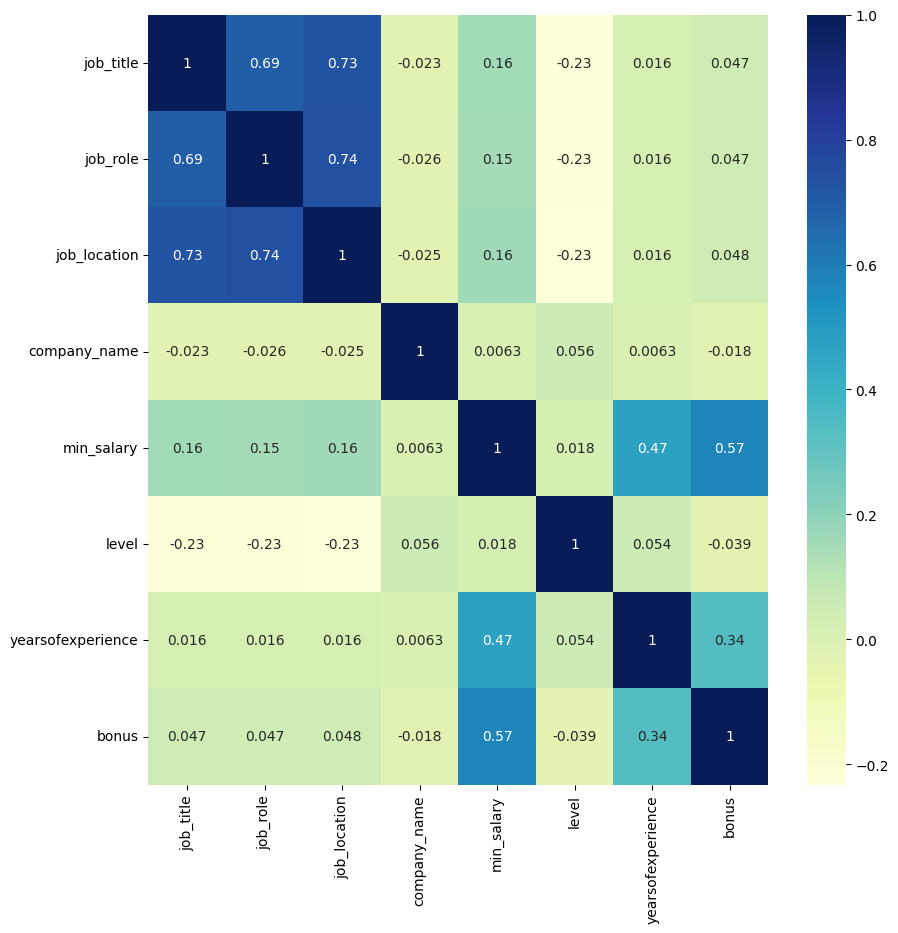

In [ ]:
#correlation heatmap
#we can see that minimum salary and maximum salary are positively correlated
#which makes sense because it is orignially a numeric value without having to go through encoding
# whereas the lighter spots like level and job_roles are negatively correlated
#note, this is shown with filling missing values 
plt.figure(figsize =(10, 10))
dataplot = sns.heatmap(merged_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

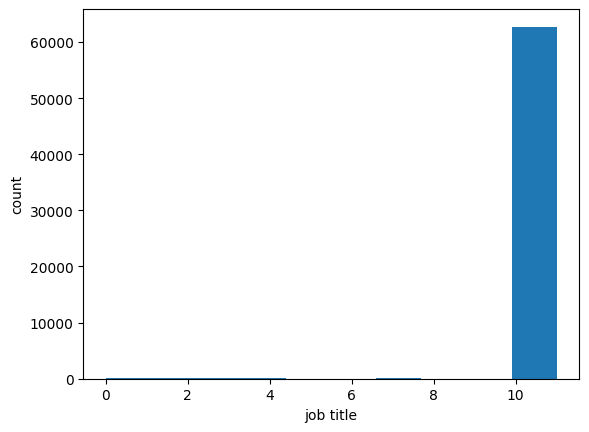

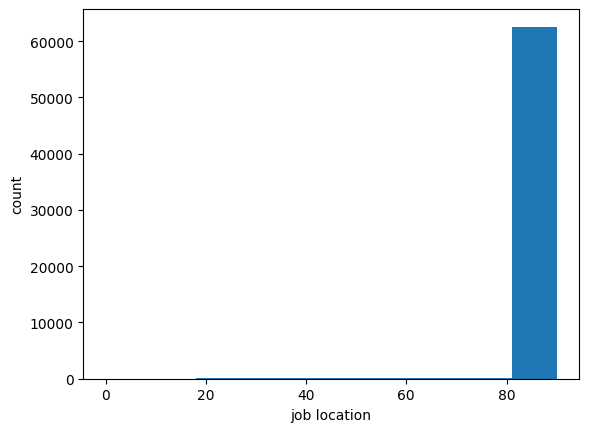

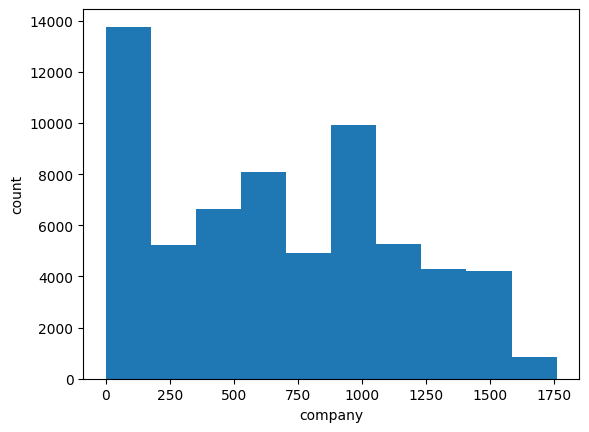

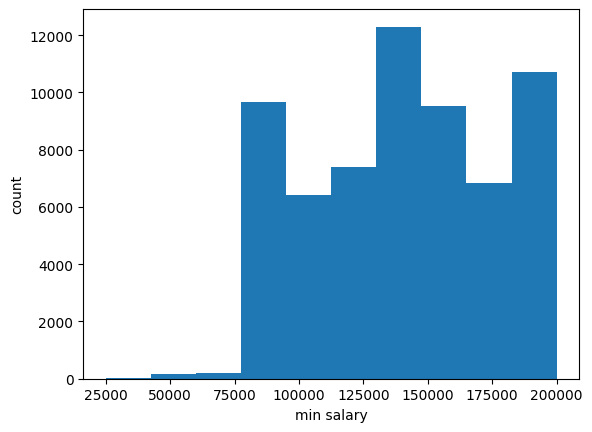

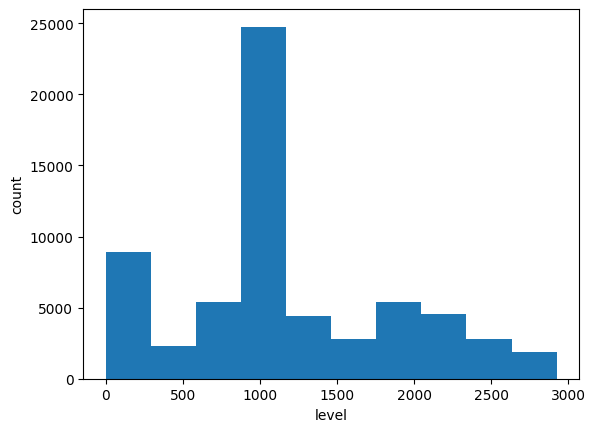

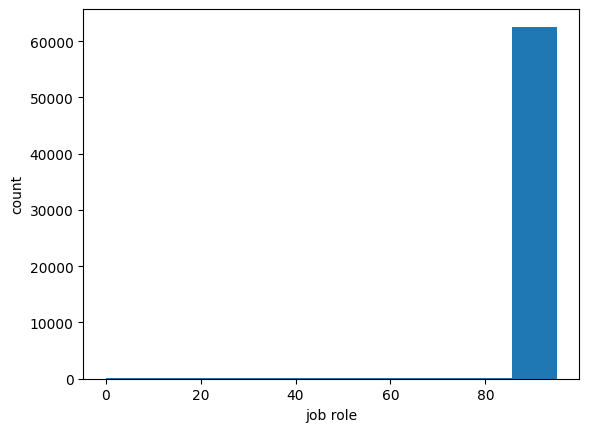

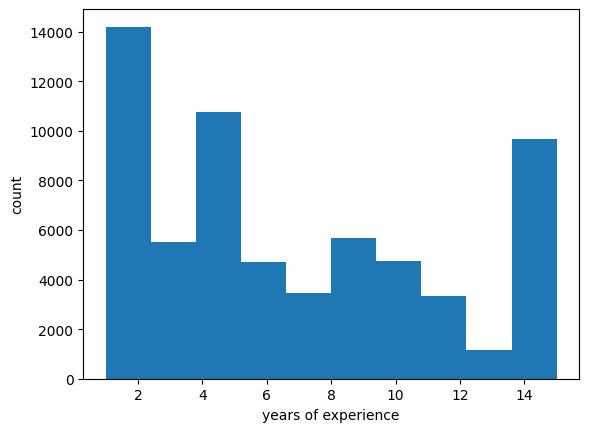

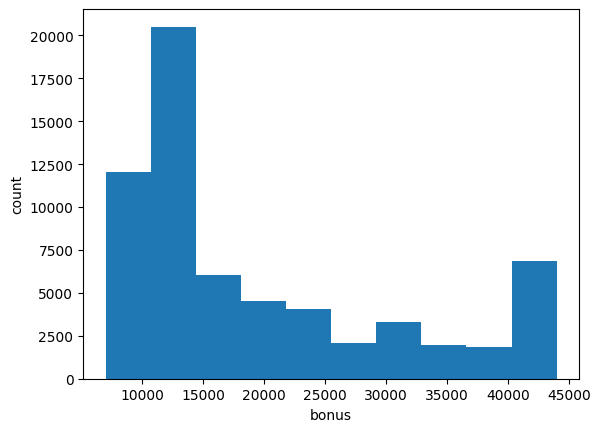

In [ ]:
plt.hist(merged_df.job_title)
plt.xlabel("job title")
plt.ylabel("count")
plt.show()
plt.hist(merged_df.job_location)
plt.xlabel("job location")
plt.ylabel("count")
plt.show()
plt.hist(merged_df.company_name)
plt.xlabel("company")
plt.ylabel("count")
plt.show()
plt.hist(merged_df.min_salary)
plt.xlabel("min salary")
plt.ylabel("count")
plt.show()
plt.hist(merged_df.level)
plt.xlabel("level")
plt.ylabel("count")
plt.show()
plt.hist(merged_df.job_role)
plt.xlabel("job role")
plt.ylabel("count")
plt.show()
plt.hist(merged_df.yearsofexperience)
plt.xlabel("years of experience")
plt.ylabel("count")
plt.show()
plt.hist(merged_df.bonus)
plt.xlabel("bonus")
plt.ylabel("count")
plt.show()

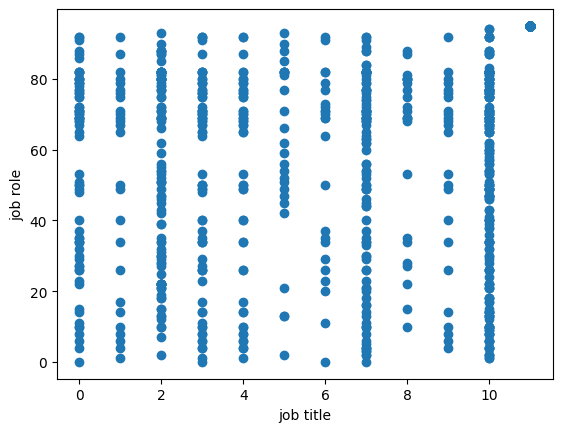

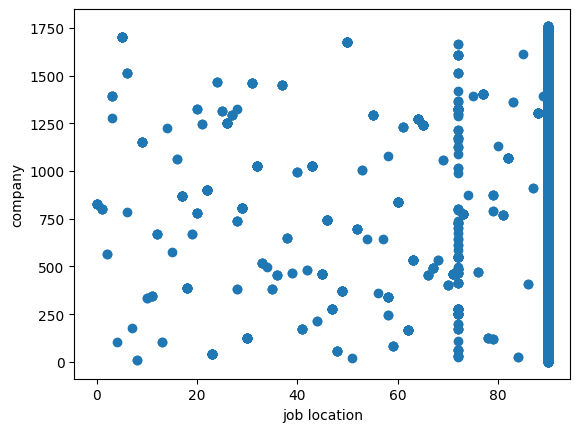

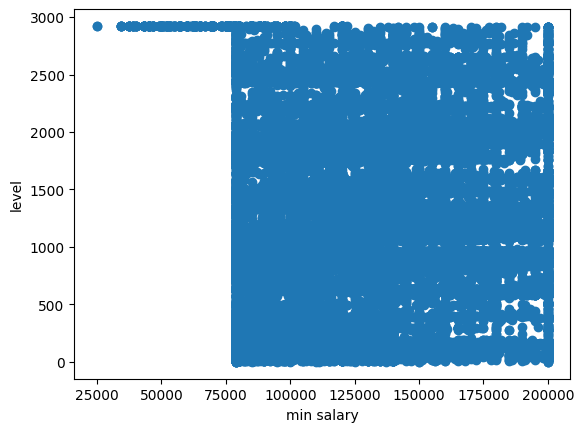

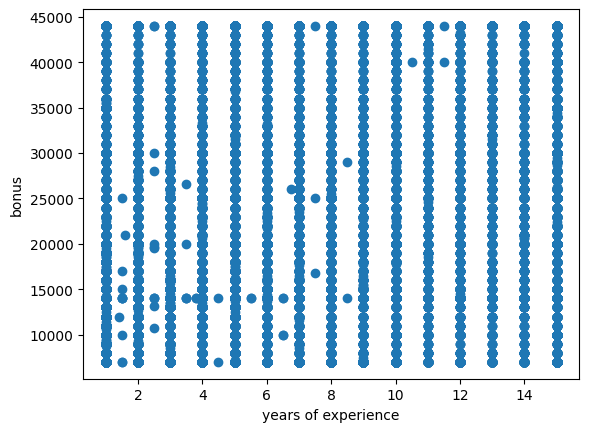

In [ ]:
plt.scatter(merged_df.job_title,merged_df.job_role)

 
 
# Setting the X and Y labels
plt.xlabel('job title')
plt.ylabel('job role')
 
plt.show()
plt.scatter(merged_df.job_location,merged_df.company_name)

 
 
# Setting the X and Y labels
plt.xlabel('job location')
plt.ylabel('company')
 
plt.show()
plt.scatter(merged_df.min_salary,merged_df.level)

 
 
# Setting the X and Y labels
plt.xlabel('min salary')
plt.ylabel('level')
 
plt.show()
plt.scatter(merged_df.yearsofexperience,merged_df.bonus)

 
 
# Setting the X and Y labels
plt.xlabel('years of experience')
plt.ylabel('bonus')
 
plt.show()



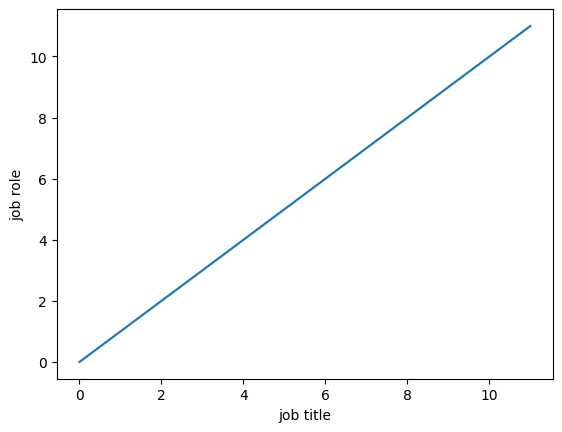

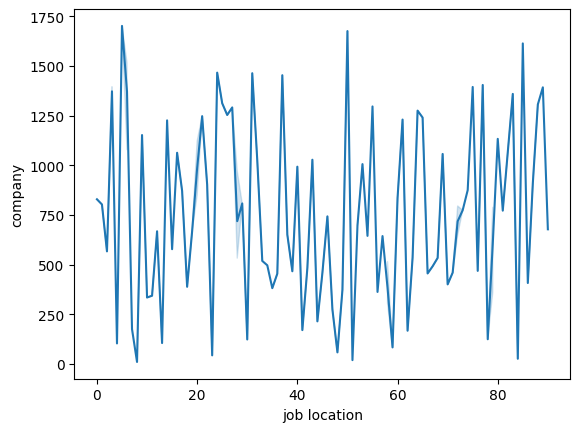

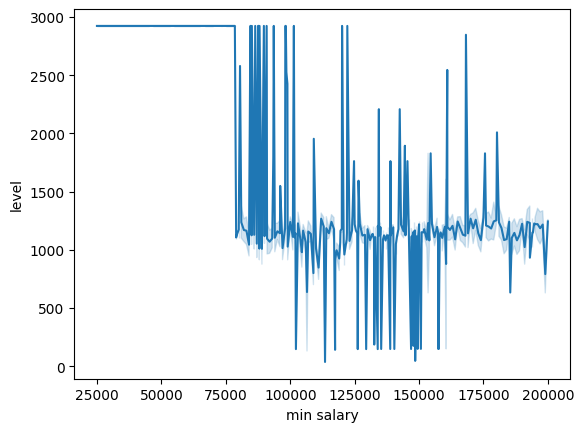

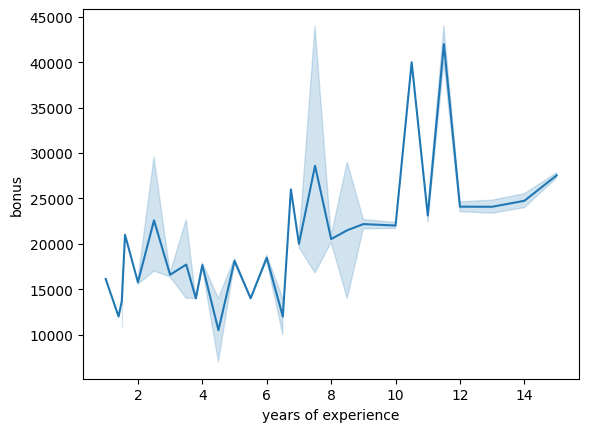

In [ ]:


 
sns.lineplot(x=merged_df.job_title, y=merged_df.job_title, data=merged_df)
plt.xlabel('job title')
plt.ylabel('job role')
 
plt.show()

sns.lineplot(x=merged_df.job_location, y=merged_df.company_name, data=merged_df)

 
 
# Setting the X and Y labels
plt.xlabel('job location')
plt.ylabel('company')
 
plt.show()

sns.lineplot(x=merged_df.min_salary, y=merged_df.level, data=merged_df)

 
 
# Setting the X and Y labels
plt.xlabel('min salary')
plt.ylabel('level')
 
plt.show()

sns.lineplot(x=merged_df.yearsofexperience, y=merged_df.bonus, data=merged_df)

 
 
# Setting the X and Y labels
plt.xlabel('years of experience')
plt.ylabel('bonus')
 
plt.show()

Isaias's part, using Gradient Boosting Regressor. Imported necessary libraries. Here I used Grid Search to tune hyperparameters

In [ ]:
#Gradient Boosting 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

features = ['job_role','job_location','job_title','company_name','level','yearsofexperience','bonus']
x = merged_df[features]
y = merged_df['min_salary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state = 42)

#param_grid = {'max_depth': [ 4, 5, 6],
#        'n_estimators': [ 150, 200, 250],
#       'learning_rate': [ 0.1, 0.2, 0.3]}

gbr = GradientBoostingRegressor(n_estimators= 250 , max_depth = 6, learning_rate = 0.2, min_samples_leaf= 3)
#grid_search = GridSearchCV (gbr, param_grid = param_grid, cv = 5, n_jobs = -1)
#grid_search.fit(x_train, y_train)
#print("Best Hyperparameters:", grid_search.best_params_)
gbr.fit(x_train,y_train)
y_pred = gbr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("MSE= ", mse)
print("MAE= ", mae)
print("R2= ", r2)


MSE=  436489657.2175025
MAE=  15175.79648563791
R2=  0.702167726085225


Best hyperparameters resulted in max depth of 6, 250 n_esitmators and 0.1 learning rate, from this further tuning was applied as high error and overfitting was present. Min leaf was the next hyperparameter was used after twaking first 3 parameters and no improvement

A percent in decimal form to indicate how well training and test data fit the model

In [ ]:
# % of how well data fits model
print(gbr.score(x_train, y_train))
print(gbr.score(x_test, y_test))

0.7623980437639499
0.702167726085225


Printing Learning Curve, Mean Squared Error vs Training Set Size

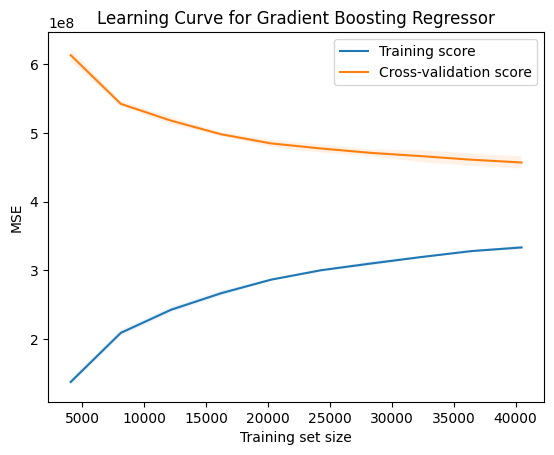

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    gbr, x_train, y_train, cv=5, scoring='neg_mean_squared_error', 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs= -1)

train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.legend()
plt.xlabel('Training set size')
plt.ylabel('MSE')
plt.title('Learning Curve for Gradient Boosting Regressor')
plt.show()

Kathareeya's part: Random Forest Regressor: feature importance and random search cv.
- First should the data be split into x and y for feature selection.

In [ ]:
x = merged_df.drop(['min_salary'], axis=1)
y = merged_df['min_salary']

importing matplotlib and random forest regressor to run and visualize the feature importances.

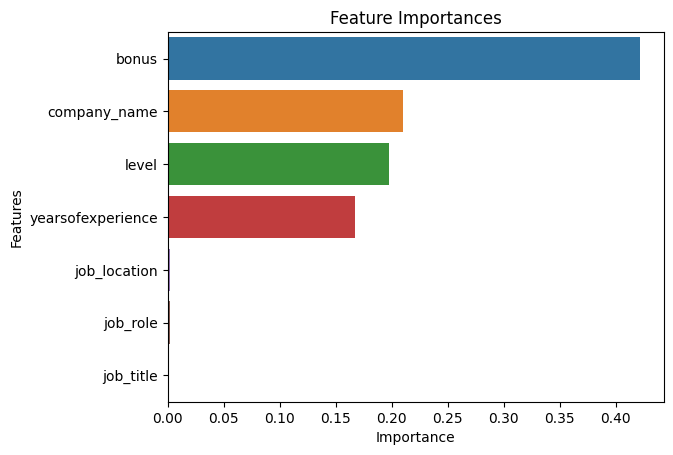

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline         



model = RandomForestRegressor()
model.fit(x, y)
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
sorted_importances = feature_importances.sort_values(ascending=False)
sns.barplot(x=sorted_importances.values, y=sorted_importances.index)

plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.show()

After observing the selected features, drop the features that contain the least importance according to random forest. The features to be dropped are job_title, job_location, job_role. lastly, dropping min_salary for 'x' because is the target(y). axis=1 indicate columns where axis=0 are rows.

In [ ]:
x = merged_df.drop(['min_salary','job_role','job_location','job_title'], axis=1)
y = merged_df['min_salary']

split the data into training and testing by 20% and 80%.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

fit into the tuned version of random forest regressor. The parameters inside is selected by random searchcv.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=100,max_depth=30, max_features=5,min_samples_split=10,min_samples_leaf=1)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features=5, min_samples_split=10)

conducting randomized search for best parameters for random forest regressor. The possible options for random forest are as follows. max features are the only possible options available while max_dept, n_estimators can have any range. But for the sake of time, decided to range from 10 to 60 for depths and 100 to 500 for number of trees.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param = {'max_features' : ['auto', 'sqrt','log2'],
         'max_depth': [10, 20,30,40,50,60, None],
          'n_estimators': [100,200,300, 400,500],
         'min_samples_split':[2, 5, 10],
         'min_samples_leaf':[1, 2, 4]}

fit the ranged param into randomized search for searching.

In [ ]:
search = RandomizedSearchCV(regr, param, n_iter=10,cv=3,random_state=42,n_jobs=-1,
scoring="neg_mean_squared_error")
search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=30, max_features=5,
                                                   min_samples_split=10),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
best_param = search.best_params_
best_param

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

having random forest to predict the value.

In [ ]:
y_pred = regr.predict(X_test)

evaluating the prediction errors random forest made using MSE, MAE, RME, and r2.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 16269.922153226467
Mean Squared Error: 519962165.6372883
Root Mean Squared Error: 22802.678913612064
R2 Score: 0.8028240975860411


In [ ]:
predictions = pd.DataFrame(y_pred)
true = pd.DataFrame(y_test)
#creates a quick table to show the features and their score
trueandpred = pd.concat([true,predictions],axis=1)
trueandpred.columns = ['true value','prediction']

comparing true values and predictions in the table.

In [ ]:
trueandpred

,true value,prediction
190,63000.0,153583.929286
23724,200000.0,NaN
38805,79000.0,NaN
40372,185000.0,NaN
53345,87000.0,NaN
...,...,...
12644,NaN,121799.544989
12645,NaN,178615.250210
12647,NaN,138245.679682
12648,NaN,90140.736625


check for overfitting and underfitting as learning curve: comparing testing and training data of the model

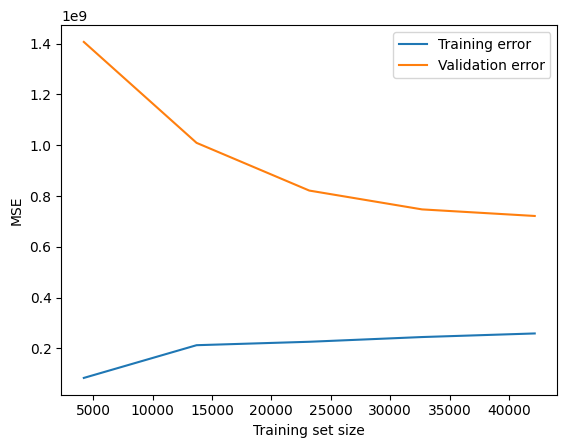

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(regr, x, y, cv=3, scoring='neg_mean_squared_error')
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, val_mean, label='Validation error')
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
# plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.show()

plotting the true values vs predictions in scatterplot. we can see that the model is more likely to overpredict due to complex models.

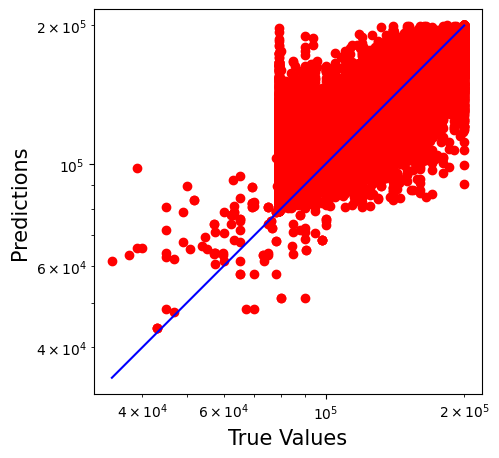

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='red')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()